# Trabalho 1
** Vou escrever algo fofo aqui

## Parte 1 : Transformação de itensidade
A ideia desta parte é aplicar alguns métodos simples para alterar os valores de intensidade de uma imagem

### Transformação do negativo da imagem
A transformada de uma imagem pode ser dada da seguinte forma : Se pegarmos uma imagem em padrão _cinza_ ou _RGB_. A imagem invertida será

img_invertida[i] = 255 - x_{i}

onde x é a imagem original e 0 <= x_{i} <= 255

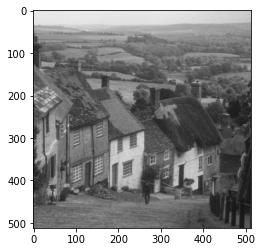

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img_city = cv2.imread("Imagens/city.png")

plt.imshow(img_city)
plt.show()  # display the image

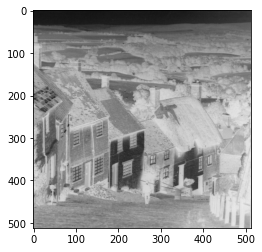

In [2]:
# fazendo o negativo da imagem
img_city_negative = 255 - img_city[:]
plt.imshow(img_city_negative)
plt.show()

### Imagem transformada em um intervalo
A ideia desta parte do projeto, é aplicar uma técnica de _threshold_ na imagem, usando um intervalo [a, b]. Neste caso, todos os valores da imagem que estiverem abaixo de a, se tornarão a e todos os valores acima de b se tornarão b

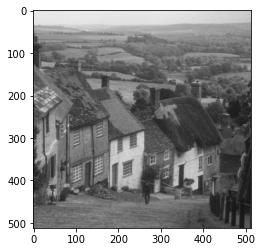

valor de pixel mínimo da imagem : 16
valor de pixel máximo da imagem : 235


In [3]:
plt.imshow(img_city)
plt.show()  # display the image

print("valor de pixel mínimo da imagem : {}".format(img_city.min()))
print("valor de pixel máximo da imagem : {}".format(img_city.max()))

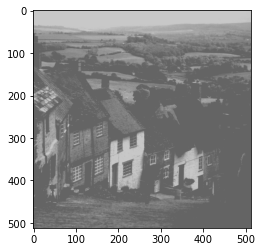

valor de pixel mínimo da imagem transformada : 100
valor de pixel máximo da imagem transformada : 200


In [4]:
# TODO : preciso ver se esta parte está correta, pois está com um comportamento estranho comparado com o relatório

img_transform = img_city.copy()
threshold_min = 100
threshold_max = 200

img_transform[img_transform < threshold_min] = threshold_min
img_transform[img_transform > threshold_max] = threshold_max

plt.imshow(img_transform)
plt.show()  # display the image

print("valor de pixel mínimo da imagem transformada : {}".format(img_transform.min()))
print("valor de pixel máximo da imagem transformada : {}".format(img_transform.max()))

### Inverter os valores de intensidade das linhas pares de uma matriz
Para esta parte, a abordagem utilizada será de fazer um _slicing_ nos índices pares da imagem e depois pegar os valores dos últimos elementos das
linhas e atribuir esses valores do fim da linha para o começo da linha

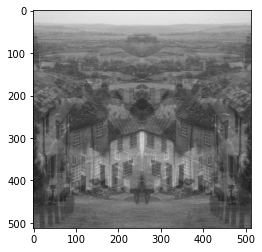

In [5]:
img_city_inverted_lines = img_city.copy()
img_city_inverted_lines[::2, :, :] = img_city_inverted_lines[::2, ::-1, :]

# Essa é uma outra alternativa de fazer a mesma operação
# img_city_inverted_lines[::2, :, :] = np.flip(img_city_inverted_lines[::2, :, :], axis=1)

plt.imshow(img_city_inverted_lines)
plt.show()

### Operação de reflexão de linhas
A ideia desta operação é pegar todos os valores das colunas até a linha que é a metade do total das linhas da imagem. Por fins práticos, vamos supor que k é
um valor inteiro que representa o índice da metade das colunas.
Após isso, as linhas k + 1 da imagem original terão os seus valores de intensidade trocados com esse outro vetor.

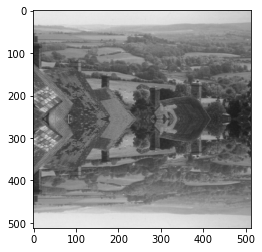

In [6]:
img_city_refleted_lines = img_city.copy()
n = img_city_refleted_lines.shape[0] // 2
half_img_city_refleted = img_city_refleted_lines[:n, :, :]
img_city_refleted_lines[n:, :, :] = half_img_city_refleted[::-1, ..., :]

# Outra alternativa seria usar o seguinte comando
# img_city_refleted_lines[n:, :, :] = np.flip(half_img_city_refleted, axis=0)

plt.imshow(img_city_refleted_lines)
plt.show()

### Espelhamento vertical
A ideia será aplicar um espelhamento vertical na imagem. Porém, utilizando todas as linhas da imagem para essa inversão

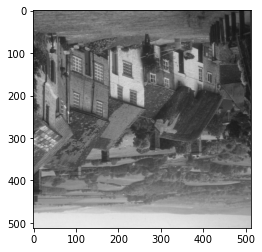

In [7]:
img_city_refleted_col = img_city.copy()
img_city_refleted_col = np.flipud(img_city)

plt.imshow(img_city_refleted_col)
plt.show()


## Parte 2 : Ajuste de Brilho
** escrever mais coisas fofas aqui
https://www.codegrepper.com/code-examples/python/convert+rgb+to+binary+image+opencv+python
https://stackoverflow.com/questions/56766146/how-to-change-the-colors-of-a-binary-image-using-python

### Transformação da imagem no intervalo [0, 100]

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

babbo = cv2.imread("Imagens/baboon.png", 0)

valor de pixel mínimo da imagem binaria : 0
valor de pixel máximo da imagem binaria : 230


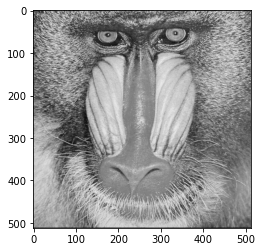

In [9]:
babbo_binary = babbo.copy()

print("valor de pixel mínimo da imagem binaria : {}".format(babbo_binary.min()))
print("valor de pixel máximo da imagem binaria : {}".format(babbo_binary.max()))

plt.imshow(babbo_binary, cmap="gray")
plt.show()  # display the image

### Aplicação da equação b = A^(1/gamma) com diferentes valores de gamma

Aplicando a equação para gamma = 1.5

valor de pixel mínimo da imagem b : 0.0
valor de pixel máximo da imagem b : 0.933523174590266


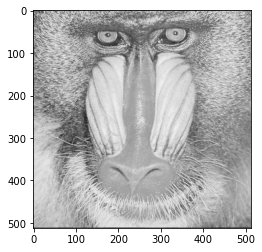

In [10]:
gamma = 1.5
b = (babbo_binary/255)**(1/gamma)

print("valor de pixel mínimo da imagem b : {}".format(b.min()))
print("valor de pixel máximo da imagem b : {}".format(b.max()))

plt.imshow(b, cmap="gray")
plt.show()  # display the image

Aplicando a equação para gamma = 2.5

valor de pixel mínimo da imagem b : 0.0
valor de pixel máximo da imagem b : 0.9595664659461479


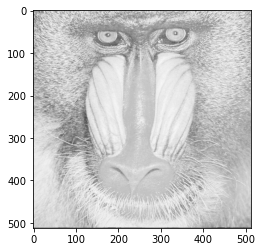

In [11]:
gamma = 2.5
b = (babbo_binary/255)**(1/gamma)

print("valor de pixel mínimo da imagem b : {}".format(b.min()))
print("valor de pixel máximo da imagem b : {}".format(b.max()))

plt.imshow(b, cmap="gray")
plt.show()  # display the image

Aplicando para gamma = 3.5

valor de pixel mínimo da imagem b : 0.0
valor de pixel máximo da imagem b : 0.9709491212611163


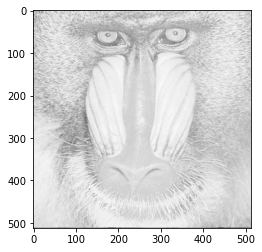

In [12]:
gamma = 3.5
b = (babbo_binary/255)**(1/gamma)

print("valor de pixel mínimo da imagem b : {}".format(b.min()))
print("valor de pixel máximo da imagem b : {}".format(b.max()))

plt.imshow(b, cmap="gray")
plt.show()  # display the image

## Plano de bits
** escrever mais coisas fofas aqui

In [13]:
#babbo = cv2.imread("Imagens/baboon.png", 0)

def bit_plane_k(img: np.ndarray, k: int) -> np.ndarray:
    """
    Função que realiza o bit plane de uma imagem

    :param img: image de entrada
    :param k: índice do plano de bit
    :return: retorna o slice do plano do bit
    """
    plane = np.full((img.shape[0], img.shape[1]), 2 ** k, np.uint8)
    res = cv2.bitwise_and(plane, img)
    res *= 255
    return res

Aplicando o plano de bit 0

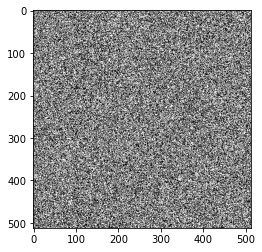

In [14]:
plt.imshow(bit_plane_k(babbo, 0), cmap="gray")
plt.show()

Aplicando o plano de bit 4

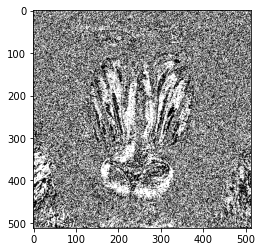

In [15]:
plt.imshow(bit_plane_k(babbo, 4), cmap="gray")
plt.show()

Aplicando o plano de bit 7

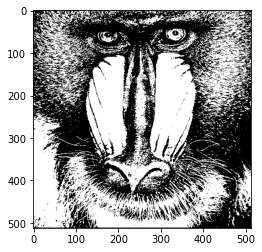

In [16]:
plt.imshow(bit_plane_k(babbo, 7), cmap="gray")
plt.show()